Tugas Technical Assigment 2 - Stage 3 - SIC Batch 5 - AI & IoT Bootcamp

In [2]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [3]:
!pip install tabulate

Eksploration Dataset

In [121]:
# Import the necessary libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from tabulate import tabulate

import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Fetch the dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# Get data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# Convert to pandas DataFrames
df_features = pd.DataFrame(X)
df_targets = pd.DataFrame(y)

# **Handle Metadata**
# Convert metadata to a dictionary for easier DataFrame creation
metadata_dict = {k: [str(v)] for k, v in ai4i_2020_predictive_maintenance_dataset.metadata.items()}
metadata_df = pd.DataFrame(metadata_dict)

# Create DataFrame for variable information
variables_df = pd.DataFrame(ai4i_2020_predictive_maintenance_dataset.variables)

# Display the metadata in a table
print("Metadata:")
print(metadata_df.transpose())

Metadata:
                                                                          0
uci_id                                                                  601
name                               AI4I 2020 Predictive Maintenance Dataset
repository_url            https://archive.ics.uci.edu/dataset/601/ai4i+2...
data_url                  https://archive.ics.uci.edu/static/public/601/...
abstract                  The AI4I 2020 Predictive Maintenance Dataset i...
area                                                       Computer Science
tasks                     ['Classification', 'Regression', 'Causal-Disco...
characteristics                             ['Multivariate', 'Time-Series']
num_instances                                                         10000
num_features                                                              6
feature_types                                                      ['Real']
demographics                                                             []
ta

In [122]:
# Display the variable information in a table
print("\nVariable Information:")
print(variables_df)


Variable Information:
                   name     role         type demographic description units  \
0                   UID       ID      Integer        None        None  None   
1            Product ID       ID  Categorical        None        None  None   
2                  Type  Feature  Categorical        None        None  None   
3       Air temperature  Feature   Continuous        None        None     K   
4   Process temperature  Feature   Continuous        None        None     K   
5      Rotational speed  Feature      Integer        None        None   rpm   
6                Torque  Feature   Continuous        None        None    Nm   
7             Tool wear  Feature      Integer        None        None   min   
8       Machine failure   Target      Integer        None        None  None   
9                   TWF   Target      Integer        None        None  None   
10                  HDF   Target      Integer        None        None  None   
11                  PWF   Tar

In [123]:
# Display the first few rows of the features DataFrame in a table
print("\nFirst few rows of the features DataFrame:")
print(tabulate(df_features.head(), headers='keys', tablefmt='psql'))


First few rows of the features DataFrame:
+----+--------+-------------------+-----------------------+--------------------+----------+-------------+
|    | Type   |   Air temperature |   Process temperature |   Rotational speed |   Torque |   Tool wear |
|----+--------+-------------------+-----------------------+--------------------+----------+-------------|
|  0 | M      |             298.1 |                 308.6 |               1551 |     42.8 |           0 |
|  1 | L      |             298.2 |                 308.7 |               1408 |     46.3 |           3 |
|  2 | L      |             298.1 |                 308.5 |               1498 |     49.4 |           5 |
|  3 | L      |             298.2 |                 308.6 |               1433 |     39.5 |           7 |
|  4 | L      |             298.2 |                 308.7 |               1408 |     40   |           9 |
+----+--------+-------------------+-----------------------+--------------------+----------+-------------+


In [124]:
# Display the first few rows of the targets DataFrame in a table
print("\nFirst few rows of the targets DataFrame:")
print(tabulate(df_targets.head(), headers='keys', tablefmt='psql'))


First few rows of the targets DataFrame:
+----+-------------------+-------+-------+-------+-------+-------+
|    |   Machine failure |   TWF |   HDF |   PWF |   OSF |   RNF |
|----+-------------------+-------+-------+-------+-------+-------|
|  0 |                 0 |     0 |     0 |     0 |     0 |     0 |
|  1 |                 0 |     0 |     0 |     0 |     0 |     0 |
|  2 |                 0 |     0 |     0 |     0 |     0 |     0 |
|  3 |                 0 |     0 |     0 |     0 |     0 |     0 |
|  4 |                 0 |     0 |     0 |     0 |     0 |     0 |
+----+-------------------+-------+-------+-------+-------+-------+


In [125]:
# Display a summary of the targets DataFrame in a table
print("\nTargets DataFrame summary:")
print(df_targets.describe())


Targets DataFrame summary:
       Machine failure           TWF           HDF           PWF  \
count     10000.000000  10000.000000  10000.000000  10000.000000   
mean          0.033900      0.004600      0.011500      0.009500   
std           0.180981      0.067671      0.106625      0.097009   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max           1.000000      1.000000      1.000000      1.000000   

                OSF          RNF  
count  10000.000000  10000.00000  
mean       0.009800      0.00190  
std        0.098514      0.04355  
min        0.000000      0.00000  
25%        0.000000      0.00000  
50%        0.000000      0.00000  
75%        0.000000      0.00000  
max        1.000000      1.00000  


In [126]:
# Combine features and targets into a single DataFrame
df_combined = pd.concat([df_features, df_targets], axis=1)

In [127]:
# Display the first few rows of the combined DataFrame in a table
print("\nFirst few rows of the combined DataFrame:")
print(tabulate(df_combined.head(), headers='keys', tablefmt='psql'))


First few rows of the combined DataFrame:
+----+--------+-------------------+-----------------------+--------------------+----------+-------------+-------------------+-------+-------+-------+-------+-------+
|    | Type   |   Air temperature |   Process temperature |   Rotational speed |   Torque |   Tool wear |   Machine failure |   TWF |   HDF |   PWF |   OSF |   RNF |
|----+--------+-------------------+-----------------------+--------------------+----------+-------------+-------------------+-------+-------+-------+-------+-------|
|  0 | M      |             298.1 |                 308.6 |               1551 |     42.8 |           0 |                 0 |     0 |     0 |     0 |     0 |     0 |
|  1 | L      |             298.2 |                 308.7 |               1408 |     46.3 |           3 |                 0 |     0 |     0 |     0 |     0 |     0 |
|  2 | L      |             298.1 |                 308.5 |               1498 |     49.4 |           5 |                 0 |  

In [128]:
# Display info of the features DataFrame
print("\nFeatures DataFrame Info:")
print(df_combined.info())


Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB
None


In [129]:
df_combined.replace("?",np.nan,inplace=True)

In [130]:
for column in df_combined.columns:
    try:
        df_combined[column]=df_combined[column].astype(float)
    except:
        pass

In [131]:
# show the numeric characters
df_combined = df_combined.select_dtypes(include=[np.number])
df_combined.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


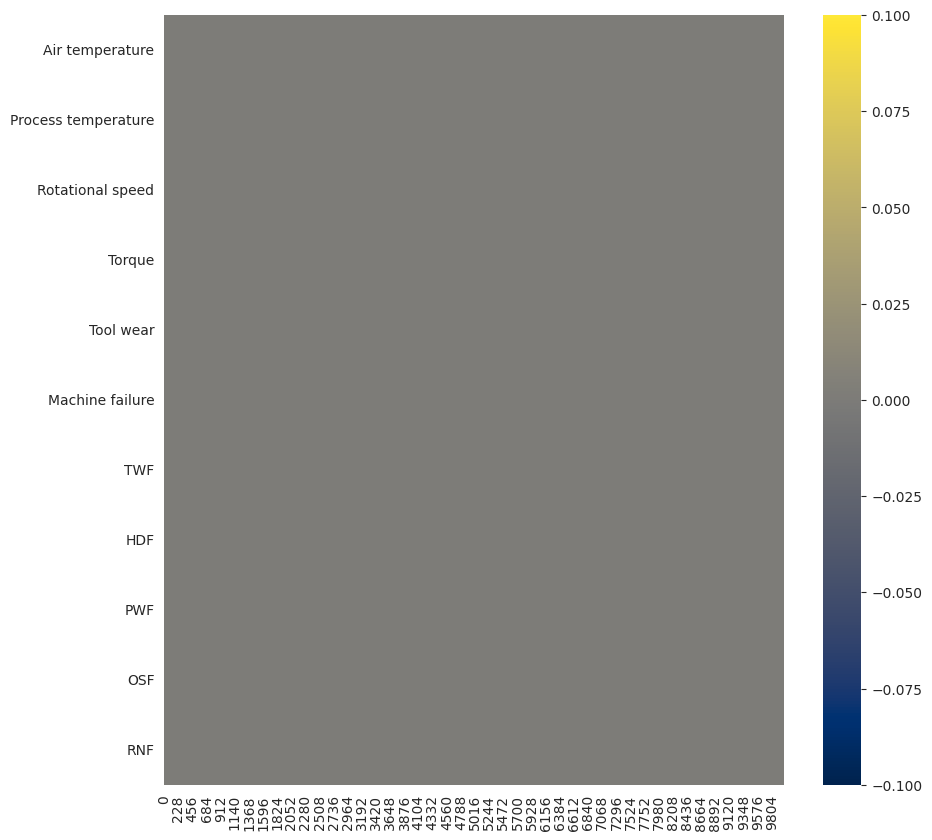

In [132]:
plt.figure(figsize=(10,10))
plot_kws={"s": 1}
sns.heatmap(df_combined.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

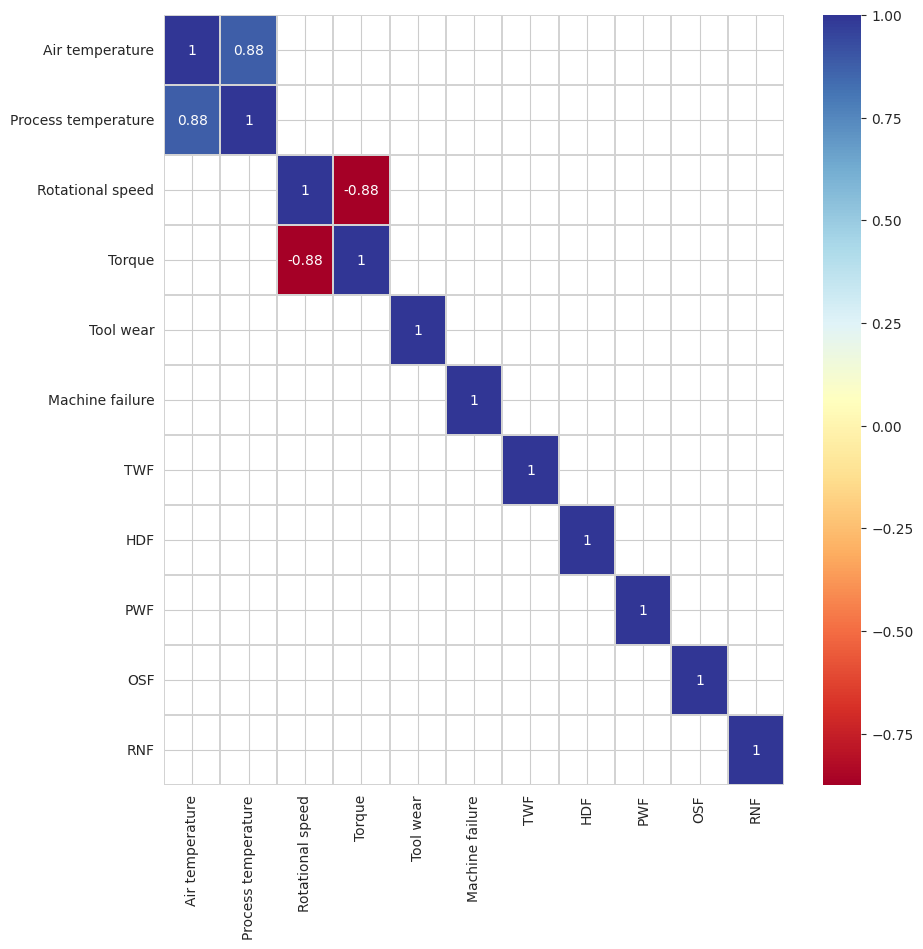

In [133]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_combined.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [134]:
df_combined.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

In [135]:
list(df_combined)

['Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear',
 'Machine failure']

In [136]:
df_combined = pd.get_dummies(df_combined,drop_first=True)

In [137]:
features = list(df_combined.columns)

In [138]:
for feature in features:
    print(feature + " - " + str(len(df_combined[df_combined[feature].isna()])))

Air temperature - 0
Process temperature - 0
Rotational speed - 0
Torque - 0
Tool wear - 0
Machine failure - 0


In [139]:
df_group = df_combined.groupby(['Machine failure'])
df_group.count()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
Machine failure,,,,,
0.0,9661,9661,9661,9661,9661
1.0,339,339,339,339,339


In [140]:
df_combined[df_combined['Machine failure'].isna()]

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure


Pre-processing and Feature Selection

In [141]:
df_combined.fillna(df_combined.mean(),inplace=True)

for feature in features:
    try:
        df_combined[feature].fillna(df_combined[feature].mean(),inplace=True)
    except:
        try:
            df_combined[feature].fillna(df_combined[feature].mode(),inplace=True)
        except:
            pass

In [142]:
df_combined.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


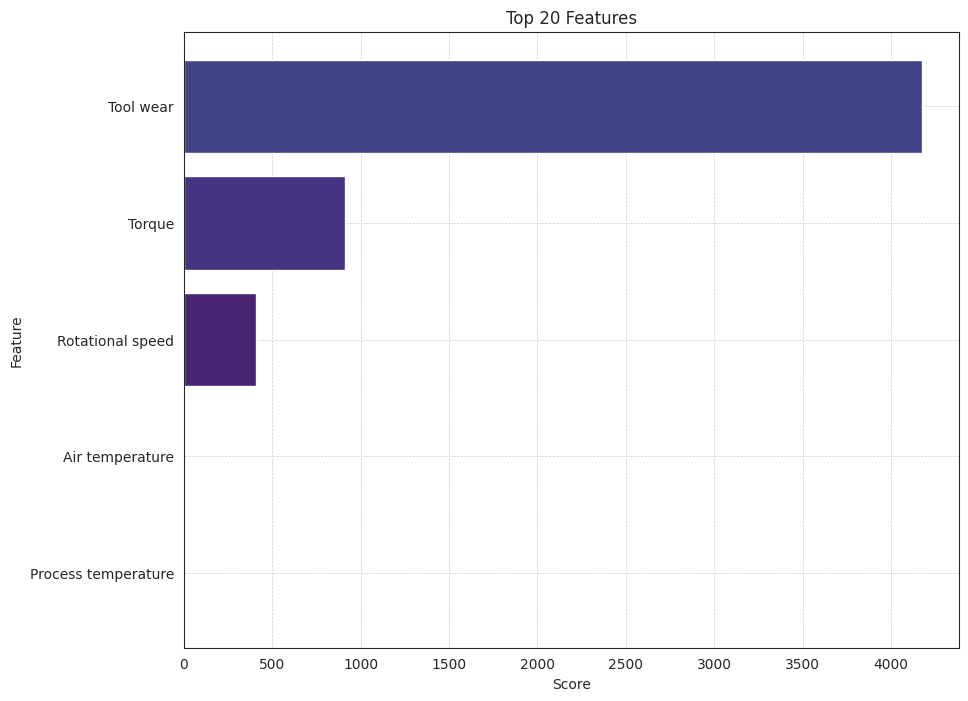

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Feature Selection
best_features = SelectKBest(score_func=chi2, k='all')

X = df_combined.iloc[:, :-1]
y = df_combined.iloc[:, -1]
fit = best_features.fit(X, y)

df_combined_scores = pd.DataFrame(fit.scores_)
df_combined_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_combined_col, df_combined_scores], axis=1)
feature_score.columns = ['feature', 'score']
feature_score.sort_values(by=['score'], ascending=True, inplace=True)

# Membuat warna gradasi
colors = plt.cm.viridis(np.linspace(0, 1, 21))

# Membuat bar plot horizontal menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.barh(feature_score['feature'][0:21], feature_score['score'][0:21], color=colors)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 20 Features')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [144]:
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)


Selected Features:
['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']


In [145]:
X = df_combined.iloc[:,:-1]
y = df_combined.iloc[:,-1]

In [146]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 5)

In [147]:
np.shape(X)

(10000, 5)

In [148]:
len(feature_names)

5

Modelling and Evaluation

In [149]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

In [151]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score,matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay # updated import for confusion matrix display

import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])

Logistic Classification

In [153]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 36.1 ms, sys: 19.8 ms, total: 56 ms
Wall time: 38.8 ms


In [154]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted', zero_division=0)
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

# Print metrics
print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1s))
print("MCC: {:.2}".format(MCC))
print("ROC AUC score: {:.2%}".format(ROC_AUC))
print("time to train: {:.2f} s".format(end_train-start))
print("time to predict: {:.2f} s".format(end_predict-end_train))
print("total: {:.2f} s".format(end_predict-start))

# Add to performance DataFrame
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s, MCC, end_train-start, end_predict-end_train, end_predict-start]


Accuracy: 96.60%
Recall: 96.60%
Precision: 93.32%
F1-Score: 94.93%
MCC: 0.0
ROC AUC score: 88.29%
time to train: 0.04 s
time to predict: 0.00 s
total: 0.04 s


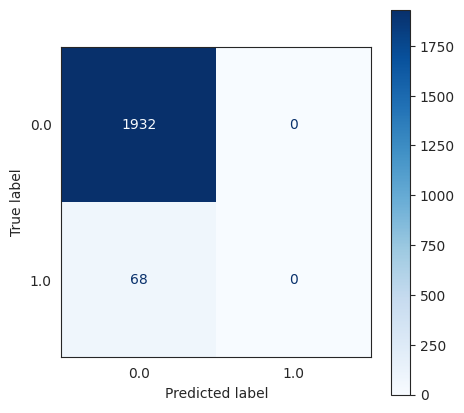

In [155]:
import matplotlib.pyplot as plt # import matplotlib
import seaborn as sns # import seaborn

plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
# Use ConfusionMatrixDisplay.from_estimator()
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Evaluate

In [156]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,time to train,time to predict,total time
Logistic,96.60%,96.60%,93.32%,94.93%,0.00%,0.0,0.0,0.0
